# Protection of clients' personal data

You need to protect the data of clients of the insurance company "Though the Flood". Develop a method for transforming data so that it is difficult to recover personal information from it. Justify the correctness of its operation.
It is necessary to protect the data so that the quality of machine learning models does not deteriorate during conversion. There is no need to select the best model.

<h1>Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data Loading" data-toc-modified-id="Data-Loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multiplying the matrices</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Algorithm</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Algorithm check</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion:</a>

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
try:
    df = pd.read_csv('/datasets/insurance.csv')        
except:
    df = pd.read_csv('insurance.csv')
df.head()  

,Sex,Age,Salary,Family_members,Insuarance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  5000 non-null   int64  
 1   Age                  5000 non-null   float64
 2   Salary               5000 non-null   float64
 3   Family_members       5000 non-null   int64  
 4   Insuarance_payments  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.rename(columns = {
    'Sex':'gender','Age':'age' ,'Salary':'income', 'Family_members':'family_members',
    'Insuarance_payments':'insurance_payouts'}, inplace = True )

Converting the age format to integer:

In [6]:
df['age'] = df['age'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5000 non-null   int64  
 1   age                5000 non-null   int32  
 2   income             5000 non-null   float64
 3   family_members     5000 non-null   int64  
 4   insurance_payouts  5000 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 175.9 KB


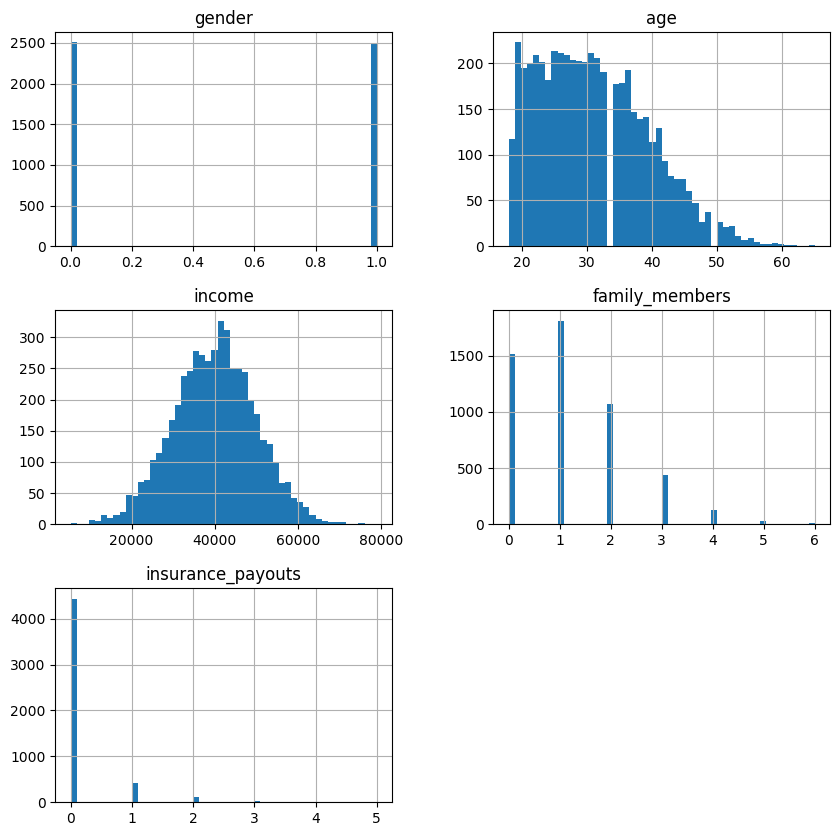

In [8]:
df.hist(bins=50, figsize=(10,10))
plt.show()

There are no anomalies in the distributions, the income is close to the normal distribution with an average value of 40,000 rubles, the majority of the insured did not apply for payments, their age ranges from 18 to 60 years.

Missing data:

In [9]:
df.isna().sum()

gender               0
age                  0
income               0
family_members       0
insurance_payouts    0
dtype: int64

Duplicates:

In [10]:
df.duplicated().sum()


153

Deleting the duplicates

In [11]:
df= df[~df.duplicated()]
df.duplicated().sum()

0

**Conclusion from step 1:** The data was downloaded and presented in good quality - no anomalies were identified. Duplicates were detected and removed.

## Multiplying the matrices

Annotations:

- $X$ — matrix of features (the zero column consists of ones)

- $y$ — vector of the target feature

- $P$ — is the matrix by which the features are multiplied

- $w$ — vector of linear regression weights (zero element equals shift)

Predictions:

$$
a = Xw
$$

Training objective:

$$
w = \arg\min_w MSE(Xw, y)
$$

Training formula:

$$
w = (X^T X)^{-1} X^T y
$$

The features are multiplied by an invertible matrix. Will the quality of linear regression change? (She can be retrained.)

  a. Will change. Give examples of matrices.
 
  b. Will not change. Indicate how the linear regression parameters in the original problem and in the transformed one are related.

**Answer:** it will not change

**Explanation:** Using the following properties of matrices:

- invertable matrix has a property:

$$
A(A)^{-1}=(A)^{-1}A=E        \qquad \qquad (1) 
$$

- transponing the multiplied matrices

$$
(AB)^{T}=(B)^{T}(A)^{T}        \qquad \qquad (2) 
$$
 - multiplication
$$
A(BC)= (AB)C      \qquad \qquad (2) 
$$

Giben the prediction vector $$a = Xw$$

where $$w = (X^T X)^{-1} X^T y$$

Let the matrix X be multiplied by some invertible matrix A $$X' = XA$$ $$w' = (X'^T X')^{-1}( X')^T y$$   
$$a' = X'w'$$
Substitute w' into the equation for a'
$$a' = X'(X'^T X')^{-1}( X')^T y$$
Let's transform the expression on the right, taking into account(1):
$$XA((XA)^T (XA))^{-1}( XA)^T y = XA(A^T X^T (XA))^{-1}(XA)^T= XA(A^T(X^T X) A)^{-1} A^T X^T y= XA A^{-1}(X^T X)^{-1}(A^T)^{-1}A^T X^T y $$
according to (2) $A A^{-1}= E $, and multiplication by the identity matrix does not change the matrix, we get:

$$     a' = X E  (X^TX)^{-1} E X^T y  = X ( X^T X)^{-1} X^T y = Xw  $$

That is, multiplication by an invertible matrix does not affect the predictions.




Since $a'= Xw = X'w'$, then $w' = Xw/X'= Xw/XA=w/A $ 
$$
w' = A^{-1} w
$$

Correction:    
$w' = (X'^T X')^{-1}( X')^T y = ((XA)^T (XA))^{-1}( XA)^T y  = (A^T (X^TX)A)^{-1}A^TX^T y = A^{-1}(X^TX)^{-1}(A^T)^{-1}A^TX^T y = A^{-1}(X^TX)^{-1}X^T y $ 
    
Since $w =(X^TX)^{-1}X^T y $, then
    
$$w' = A^{-1}(X^TX)^{-1}X^T y = A^{-1}w $$
</div>

## Transformaton algorythm

Propose a data transformation algorithm to solve the problem. Justify why the quality of linear regression will not change.

**Algorithm**

Let's multiply the matrix with features by an invertible matrix.
Steps:
- create an invertible matrix. A matrix is invertible if its determinant is nonzero, so we need to check the determinant. Matrices can also be multiplied if the width of one matrix is equal to the height of another - you need to take into account the dimension when composing the matrix

- we study the quality of the model on the initial data
- we examine the quality of the model on the converted data; if the metrics match, it means that the encryption is working correctly.

**Explanation**
It was proven above that when the feature matrix is multiplied by an invertible matrix, the prediction vector does not change.

## Algorythm proof

In [12]:
def find_r2(data, A):
    features = data.drop('insurance_payouts', axis=1)
    target = data['insurance_payouts']
    
    features = features@A
    
    target_train, target_valid, features_train, features_valid = train_test_split(
    target, features, test_size=0.25, random_state=12345)
    
    #scaling
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    model = LinearRegression()
    
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    return r2_score(target_valid, predictions)
        
    

In [13]:
#generating random matrix
random_matrix= np.random.randint(100, size=(df.drop('insurance_payouts', axis=1).shape[1],df.drop('insurance_payouts', axis=1).shape[1]))
#find determinant, to make sure that the matrix is invertable
determinant = np.linalg.det(random_matrix)

print("Determinant:", determinant)

Determinant: 42053795.99999998


In [14]:
#generate an identity matrix to obtain an unchanged feature matrix
einheitsmatrix=np.eye(4)

In [17]:
print('For unchanged data R2=', find_r2(df, einheitsmatrix))


For unchanged data R2= 0.42307727492148217


In [18]:
print('For unchanged data R2= ', find_r2(df, random_matrix))

For unchanged data R2=  0.4230772749214329


In [20]:
find_r2(df, einheitsmatrix)-find_r2(df, random_matrix)

4.929390229335695e-14

We got a very small discrepancy in the metric. This means that the algorithm works, the features are calculated in the same way.

### Conclusion:
It has been proven that when the feature matrix is multiplied by any invertible matrix, the prediction vector does not change. An algorithm has been developed for data encryption - the features are multiplied by a matrix generated from random numbers, the invertibility of this matrix is checked by finding the determinant, and the R2 metric is checked. It was revealed that the metric is the same for unchanged data and for encrypted data.
